<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Details" data-toc-modified-id="Details-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Details</a></span></li><li><span><a href="#Example:-Number-of-credits-earned-per-semester" data-toc-modified-id="Example:-Number-of-credits-earned-per-semester-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Example: Number of credits earned per semester</a></span></li></ul></div>

# Binomial Distribution

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

from ipywidgets import interact, IntSlider, FloatSlider

%matplotlib inline

### Introduction

The binomial distribution is closely related to the Bernoulli distribution -- The binomial distribution is the distribution over the number of successes of $N$ draws from a Bernoulli distribution.

Below we give a few examples of binomial random variables:

* The number of heads flipped in 10 coin flips
* The number of job offers from 50 job applications
* The number of penalty shots made by a particular soccer team

### Details

Similar to the Bernoulli distribution, the binomial distribution will depend on a parameter $p$ which denotes the "probability of success" for a single draw of the Bernoulli random variable, however, it adds a second parameter $N$ which is the total number of draws taken from the underlying Bernoulli distribution.

A binomial random variables can take values $y \in \{0, 1, 2, \dots, N\}$. The lower bound is 0 because you can't have a negative number of successes while the upper bound is $N$ because you can't succeed more than $N$ times with $N$ draws from a Bernoulli distribution.

The probability mass function is given by

$$f(n; N, p) = {N \choose n} (1 - p)^{N-n} p^n $$

* **Mean**: $N p$
* **Variance**: $N p (1 - p)$

In [2]:
def binomial_plot_pmf_cmf(N, p):
    brv = st.binom(N, p)
    fig, ax = plt.subplots(1, 2, figsize=(9, 6))
    
    xvals = np.arange(N+1)
    ax[0].bar(xvals, brv.pmf(xvals), width=0.1)
    ax[0].set_title("Probability Mass Function")
    
    xvals = np.linspace(-0.10, N+0.10, 10000)
    ax[1].plot(xvals, brv.cdf(xvals))
    ax[1].set_title("Cumulative Distribution Function")
    
    return None

In [3]:
ns = IntSlider(
    value=5, min=1, max=50,
    step=1, description="Number of draws",
    style={"description_width": "50%"},
    layout={"width": "40%"}
)
ps = FloatSlider(
    value=0.5, min=0.0, max=1.0,
    step=0.05, description="Probability of success (p)",
    style={"description_width": "50%"},
    layout={"width": "40%"}
)

output = interact(binomial_plot_pmf_cmf, N=ns, p=ps)

interactive(children=(IntSlider(value=5, description='Number of draws', layout=Layout(width='40%'), max=50, mi…

### Example: Number of credits earned per semester

Suppose that a student passes a class with probability 0.8 and that all students are expected to take 4 (3 hour) classes per semester. The number of hours that a student earns in a given semester would be described by multiply the number of classes passed (which is distributed according to a binomial distribution) by 3.

In [4]:
p = 0.8
N = 4
C = 3

brv = st.binom(N, p)

We could determine the number of credits earned by a single student by drawing from the binomial that deterimines how many classes a student passed and multiplying by 3

In [5]:
brv.rvs()*3

9

Additionally, we could think about what the distribution of credits earned in a semester across many students might look like according to this binomial distribution.

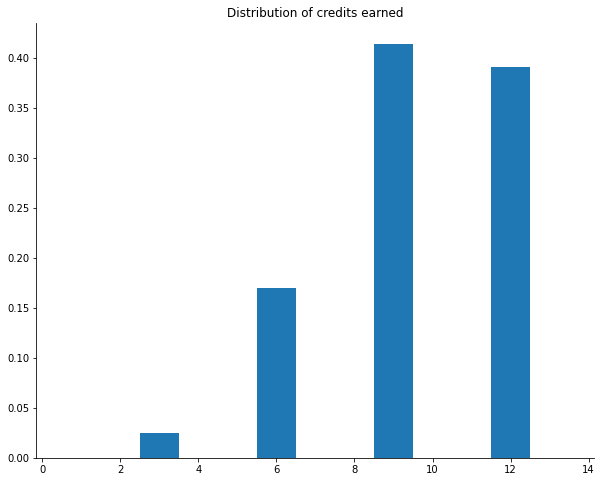

In [6]:
classes_passed = brv.rvs(1000)
credits_earned = 3*classes_passed

fig, ax = plt.subplots(figsize=(10, 8))

ax.hist(
    credits_earned, density=True,
    bins=np.linspace(0.5, 13.5, 14), align="mid"
)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_title("Distribution of credits earned");

**Note**: In creating this notebook, I referenced the "Distribution Explorer" material found at https://distribution-explorer.github.io/index.html. I certainly encourage others to find additional information there.